In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset_train = pd.read_csv(r"C:\Users\ramni\Downloads\GOOG.csv")
training_set = dataset_train.iloc[:,1:2].values

[[  49.813286]
 [  50.316402]
 [  55.168217]
 ...
 [1196.97998 ]
 [1180.      ]
 [1191.890015]]


In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(training_set)
training_scaled.shape

(3809, 1)

In [5]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))    

In [7]:
X_train.shape

(1198, 60, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [20]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [21]:
regressor.fit(X_train,y_train, epochs = 100, batch_size = 64,workers = 4,  use_multiprocessing=True)              

Epoch 1/100
19/19 [==============================] - 19s 224ms/step - loss: 0.0044
Epoch 2/100
19/19 [==============================] - 4s 222ms/step - loss: 0.0010
Epoch 3/100
19/19 [==============================] - 4s 216ms/step - loss: 4.1758e-04
Epoch 4/100
19/19 [==============================] - 4s 231ms/step - loss: 3.5403e-04
Epoch 5/100
19/19 [==============================] - 4s 199ms/step - loss: 3.4692e-04
Epoch 6/100
19/19 [==============================] - 4s 202ms/step - loss: 3.4091e-04
Epoch 7/100
19/19 [==============================] - 4s 205ms/step - loss: 3.0672e-04
Epoch 8/100
19/19 [==============================] - 4s 206ms/step - loss: 2.8848e-04
Epoch 9/100
19/19 [==============================] - 4s 206ms/step - loss: 2.6431e-04
Epoch 10/100
19/19 [==============================] - 4s 204ms/step - loss: 2.3957e-04
Epoch 11/100
19/19 [==============================] - 4s 198ms/step - loss: 2.4707e-04
Epoch 12/100
19/19 [==============================] - 4s 20

In [22]:
X_test = []
y_test = []

for i in range(1259,1500):
    X_test.append(training_scaled[i-60:i, 0])
    y_test.append(training_scaled[i, 0])
X_test, y_test = np.array(X_train), np.array(y_train)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))    

In [25]:
y_pred=regressor.predict(X_test)

38/38 [==============================] - 1s 31ms/step


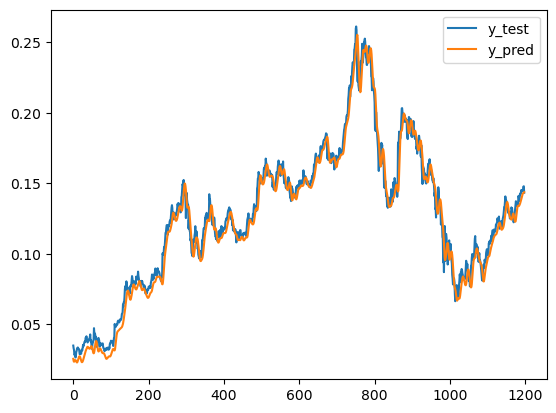

In [29]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["y_test","y_pred"])
plt.show()